In [1]:
!pip install ultralytics roboflow easyocr supervision==0.1.0 -q

### Import Libraries

In [2]:
import glob

from IPython.display import display, Image
from roboflow import Roboflow
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### Load Models

In [3]:
model = YOLO(' .pt')
model.fuse()

100%|██████████| 109M/109M [00:00<00:00, 463MB/s] 


YOLO11x summary (fused): 464 layers, 56,919,424 parameters, 0 gradients, 194.9 GFLOPs


### Testing

In [4]:
results = model.predict(source='/kaggle/input/car-plate-detection/images/Cars0.png', conf=0.25, save=True)


image 1/1 /kaggle/input/car-plate-detection/images/Cars0.png: 352x640 1 car, 66.5ms
Speed: 10.1ms preprocess, 66.5ms inference, 171.2ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict


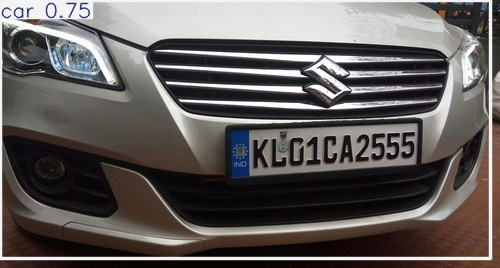

In [5]:
Image(filename=r'/kaggle/working/runs/detect/predict/Cars0.jpg', width=600)

### Load Data from Roboflow

In [6]:
rf = Roboflow(api_key="keJ6MMMWIdGGqANkazQc")

project = rf.workspace("moin").project("car_license_plates")

loading Roboflow workspace...
loading Roboflow project...


In [7]:
dataset = project.version(2).download("yolov11")


Extracting Dataset Version Zip to Car_License_Plates-2 in yolov11:: 100%|██████████| 1436/1436 [00:00<00:00, 8356.35it/s]


### Training

In [8]:
model.train(data="/kaggle/working/Car_License_Plates-2/data.yaml", epochs=80, imgsz=640)

Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.pt, data=/kaggle/working/Car_License_Plates-2/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 24.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2784  ultralytics.nn.modules.conv.Conv             [3, 96, 3, 2]                 
  1                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  2                  -1  2    389760  ultralytics.nn.modules.block.C3k2            [192, 384, 2, True, 0.25]     
  3                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
  4                  -1  2   1553664  ultralytics.nn.modules.block.C3k2            [384, 768, 2, True, 0.25]     
  5                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              
  6                  -1  2   5022720  ultralytics.nn.modules.block.C3k2            [768, 768, 2, True]           
  7                  -1  1   5309952  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 102MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Car_License_Plates-2/train/labels... 618 images, 1 backgrounds, 0 corrupt: 100%|██████████| 618/618 [00:00<00:00, 1175.02it/s]

train: New cache created: /kaggle/working/Car_License_Plates-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.22 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/Car_License_Plates-2/valid/labels... 64 images, 0 backgrounds, 0 corrupt: 100%|██████████| 64/64 [00:00<00:00, 1464.18it/s]


val: New cache created: /kaggle/working/Car_License_Plates-2/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      16.4G      2.049      2.977      1.899         13        640: 100%|██████████| 39/39 [01:08<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all         64         68      0.855      0.607       0.68      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80        16G      1.695      1.706      1.476         17        640: 100%|██████████| 39/39 [01:07<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]

                   all         64         68      0.725      0.515      0.594      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80        16G       1.59      1.342      1.464         21        640: 100%|██████████| 39/39 [01:06<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]

                   all         64         68      0.661      0.662      0.642      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      16.1G      1.618      1.328      1.472         24        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         64         68      0.794      0.603      0.692      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      16.4G      1.575      1.188       1.44         13        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all         64         68      0.779      0.721       0.76       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      16.2G      1.493      1.091      1.398         15        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all         64         68      0.741      0.757      0.815      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      16.1G      1.539      1.107      1.414         16        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]

                   all         64         68      0.784      0.691      0.672      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      15.9G       1.43      1.032      1.343         13        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         64         68      0.774      0.676      0.709      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80        16G      1.506      1.068      1.403         17        640: 100%|██████████| 39/39 [01:07<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all         64         68      0.747      0.782      0.787       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      16.6G      1.401     0.9772      1.344         16        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all         64         68      0.752      0.721      0.773      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      16.2G        1.4     0.9481      1.323         19        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]

                   all         64         68      0.764      0.763      0.768      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      16.1G      1.333     0.8974      1.308         15        640: 100%|██████████| 39/39 [01:06<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         64         68      0.767      0.727      0.799      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80        16G      1.367     0.8882      1.331         21        640: 100%|██████████| 39/39 [01:07<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all         64         68      0.831      0.651      0.796      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      16.2G      1.332     0.8688      1.309         15        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         64         68      0.772      0.735      0.755      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      16.6G       1.31     0.8179      1.282         15        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]

                   all         64         68      0.831      0.794      0.795      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      16.2G       1.31     0.8489      1.307         16        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all         64         68      0.725      0.779      0.772       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      16.5G      1.294     0.8762       1.29         14        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]

                   all         64         68      0.868      0.773       0.85      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      16.2G      1.282     0.8168      1.265         18        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all         64         68      0.757      0.735      0.766      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80        16G      1.264     0.8278      1.254         17        640: 100%|██████████| 39/39 [01:07<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]

                   all         64         68      0.892      0.728      0.801      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      16.6G      1.226     0.7805      1.253         17        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all         64         68      0.875      0.691      0.822      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      16.1G      1.222     0.7429       1.25         15        640: 100%|██████████| 39/39 [01:07<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all         64         68      0.854       0.75      0.839      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      16.1G      1.239     0.7632      1.258         20        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all         64         68      0.846       0.75      0.847      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      16.2G      1.156     0.7185      1.226         20        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]

                   all         64         68      0.833      0.765        0.8      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      16.1G      1.167     0.7193      1.216         23        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all         64         68      0.956      0.765       0.85      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      16.4G      1.102     0.6747      1.173         17        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all         64         68      0.862      0.779       0.86      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      16.1G      1.109     0.6756      1.197         17        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]

                   all         64         68      0.893      0.809      0.826      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      16.2G      1.072     0.6565      1.173         16        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

                   all         64         68      0.862      0.721      0.819      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      16.4G      1.095     0.6592      1.167         15        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all         64         68      0.935       0.84      0.874      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80        16G      1.036     0.6307       1.15         13        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all         64         68      0.838      0.735       0.81      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      16.2G      1.052     0.6419      1.145         13        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         64         68      0.944      0.747      0.837      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      16.2G       1.05     0.6333      1.159         15        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]

                   all         64         68      0.896      0.763      0.869      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      15.9G     0.9982     0.6124      1.131         20        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         64         68       0.86      0.824      0.869      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      16.4G     0.9697     0.5771      1.112         16        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         64         68        0.9      0.735      0.851      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      16.2G     0.9524     0.5857      1.108         18        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all         64         68      0.837      0.765      0.836      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      16.2G     0.9363     0.5661      1.093         22        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

                   all         64         68      0.818      0.824      0.867      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      16.1G     0.9172     0.5411       1.08         18        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all         64         68      0.946       0.75      0.865      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80        16G     0.8952     0.5217      1.073         14        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all         64         68      0.936      0.859      0.899       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      16.1G     0.8667     0.5208      1.064         15        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         64         68      0.836      0.838      0.899      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      16.2G     0.8685     0.5306      1.064         17        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]

                   all         64         68      0.943      0.809      0.883      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      16.2G     0.8968     0.5326      1.066         17        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all         64         68      0.834      0.838      0.865      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      16.4G     0.8431     0.5151      1.053         22        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all         64         68      0.932      0.735      0.883      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      16.6G     0.9006     0.5346      1.062         10        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all         64         68      0.946      0.771      0.883       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      16.2G     0.8504     0.5139      1.042         16        640: 100%|██████████| 39/39 [01:06<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

                   all         64         68      0.916      0.794       0.89      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      16.2G     0.7868      0.484      1.031         12        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all         64         68      0.946      0.774      0.875      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      16.4G     0.7992     0.4775       1.03         12        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all         64         68      0.844      0.797      0.843      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      16.2G     0.7898     0.4679       1.01         20        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all         64         68      0.964      0.765      0.903      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      16.6G     0.7948     0.4781      1.024         15        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]

                   all         64         68      0.963      0.765      0.851      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      16.6G     0.7807     0.4776      1.029         12        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all         64         68      0.862      0.765       0.84      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      16.5G     0.7377     0.4512     0.9973         16        640: 100%|██████████| 39/39 [01:07<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         64         68      0.842      0.782      0.829      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      16.2G     0.7067     0.4413      0.984         20        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         64         68      0.889      0.779      0.862       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      16.2G     0.7123     0.4277     0.9779         20        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

                   all         64         68        0.9      0.824       0.91      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      15.9G      0.685     0.4156      0.981         16        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all         64         68      0.948      0.794      0.872      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      16.4G     0.6634     0.4045     0.9712         16        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all         64         68      0.918      0.819      0.866        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      16.2G     0.6552     0.4116       0.96         21        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         64         68      0.891       0.84      0.872      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      16.2G      0.654     0.4014     0.9559         15        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

                   all         64         68        0.9      0.792      0.867      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      16.1G     0.6406      0.391     0.9512         15        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         64         68      0.944      0.743      0.862      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      16.4G     0.6398     0.4062     0.9515         16        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         64         68      0.935      0.824      0.888      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      16.2G     0.6223     0.4013       0.95         17        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         64         68      0.928      0.809      0.887      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      16.6G     0.6004     0.3815     0.9425         16        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

                   all         64         68      0.965      0.807      0.891      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      16.6G     0.6103     0.3772     0.9387         18        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         64         68      0.966      0.835       0.91      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      16.4G     0.5966     0.3746     0.9344         23        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all         64         68      0.961      0.809      0.905      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      16.6G      0.567     0.3734     0.9223         14        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all         64         68      0.871      0.838      0.883      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      16.6G     0.5806     0.3822     0.9359         21        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]

                   all         64         68      0.933       0.82      0.877      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      15.9G      0.563     0.3633     0.9311         24        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all         64         68       0.96      0.794      0.873      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      16.1G     0.5678     0.3611     0.9169         12        640: 100%|██████████| 39/39 [01:07<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]

                   all         64         68      0.897      0.809      0.855      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      16.2G     0.5478     0.3523     0.9126         16        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         64         68      0.885       0.79      0.879      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      16.6G     0.5651     0.3514     0.9313         16        640: 100%|██████████| 39/39 [01:06<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]

                   all         64         68      0.956      0.779      0.895      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      16.1G     0.5079     0.3229     0.9003         16        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         64         68      0.889      0.823      0.876      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80        16G     0.5103     0.3351      0.901         22        640: 100%|██████████| 39/39 [01:07<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all         64         68      0.909      0.809      0.898      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      16.6G     0.5283     0.3352     0.8946         23        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all         64         68      0.891      0.838      0.886      0.521


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      16.6G     0.4538     0.2804     0.8638         10        640: 100%|██████████| 39/39 [01:07<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]

                   all         64         68      0.904      0.831      0.879      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      16.1G     0.4263     0.2694     0.8507         14        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         64         68      0.967      0.794      0.893      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80        16G      0.413     0.2641     0.8428         10        640: 100%|██████████| 39/39 [01:07<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all         64         68      0.983      0.831      0.896      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      16.1G     0.4287     0.2724     0.8611          9        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all         64         68      0.982      0.809      0.897      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      16.2G     0.3999     0.2503     0.8453         12        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]

                   all         64         68      0.977      0.809      0.895      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      16.1G     0.3885     0.2456     0.8324         12        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         64         68      0.956      0.824      0.887      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80        16G     0.3793     0.2443     0.8381         11        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all         64         68      0.979      0.824      0.896      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      16.1G     0.3686     0.2382     0.8359         11        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all         64         68      0.979      0.824        0.9      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      16.2G     0.3767     0.2385     0.8393         11        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

                   all         64         68      0.966      0.835      0.897      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      16.1G     0.3537      0.232     0.8382         11        640: 100%|██████████| 39/39 [01:06<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all         64         68      0.966      0.834      0.898      0.549



80 epochs completed in 1.588 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 114.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 114.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11x summary (fused): 464 layers, 56,828,179 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


                   all         64         68      0.961      0.824      0.897      0.554
Speed: 0.2ms preprocess, 30.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cd691aec130>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

### Test Model in Data Batch

In [9]:
for image_path in glob.glob(r'/kaggle/working/runs/detect/train3/*.jpg'):
    display(Image(filename=image_path, width=600))

    print("-" * 100, "\n")

### Evaluation Metrics

In [10]:
for image_path in glob.glob(r'/kaggle/working/runs/detect/train3/*.png'):
    display(Image(filename=image_path, width=600))

    print("-" * 100, "\n")

### Model Metrics

In [11]:
model.val(data=r'/kaggle/working/Car_License_Plates-2/data.yaml')

Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11x summary (fused): 464 layers, 56,828,179 parameters, 0 gradients, 194.4 GFLOPs


val: Scanning /kaggle/working/Car_License_Plates-2/valid/labels.cache... 64 images, 0 backgrounds, 0 corrupt: 100%|██████████| 64/64 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


                   all         64         68      0.966      0.834      0.899      0.548
Speed: 0.4ms preprocess, 33.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cd6903942e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

### Select the Best Model

In [12]:
best = YOLO(model=r"/kaggle/working/runs/detect/train3/weights/best.pt")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/runs/detect/train3/weights/best.pt'

### Testing

In [ ]:
best.predict(conf=0.25,
             source=r"/kaggle/working/Car_License_Plates-2/test/images/Cars129_png.rf.881823a221699ef0677915cea761bdbf.jpg",
             save=True)

### Show Prediction Image

In [ ]:
Image(filename=r'/kaggle/working/runs/detect/predict2/Cars129_png.rf.881823a221699ef0677915cea761bdbf.jpg', width=600)

### Compress Run Folder

In [ ]:
import shutil

shutil.make_archive("/kaggle/working/runs", 'zip', "/content/runs")

### download Folder

In [ ]:
from google.colab import files

files.download("/kaggle/working/runs.zip")